In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sunRay.parameters import c,c_r,R_S  # physics parameters
from scipy import integrate


from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [2]:

%load_ext autoreload
%autoreload 2

In [3]:

#data_set  = np.load('../RUN3/funda/RUN_[eps0.27]_[alpha0.72143].lv1.npz')

data_set  = np.load('../RUN3/funda/RUN_[eps0.282]_[alpha0.72143].lv1.npz')
#data_set  = np.load('../RUN3/funda/RUN_[eps0.27]_[alpha0.614].lv1.npz')
pat='funda'
#data_set  = np.load('../RUN3/'+pat+'/RUN_[eps0.102]_[alpha0.15743].lv1.npz')
#data_set  = np.load('../RUN3/'+pat+'/RUN_[eps0.354]_[alpha0.15743].lv1.npz')
data_set  = np.load('../RUN3/'+pat+'/RUN_[eps0.102]_[alpha0.802].lv1.npz')
#data_set  = np.load('../RUN3/'+pat+'/RUN_[eps0.354]_[alpha0.802].lv1.npz')


#data_set  = np.load('../RUN3/f105/RUN_[eps0.354]_[alpha0.15743].lv1.npz')

#

In [4]:
dir(data_set.f)

['anis',
 'asym',
 'collect_N',
 'epsilon',
 'f_ratio',
 'freq0',
 'k_vec_0',
 'k_vec_stat_avail',
 'omega0',
 'photon_N',
 'r_vec_0',
 'r_vec_stat_avail',
 'start_phi',
 'start_r',
 'start_theta',
 'steps_N',
 't_reach_stat_avail',
 'tau_stat_avail']

In [5]:
# collect the data
anis  = data_set.f.anis
asym  = data_set.f.asym
collect_N  = data_set.f.collect_N
epsilon  = data_set.f.epsilon
f_ratio  = data_set.f.f_ratio
freq0  = data_set.f.freq0
k_vec_0  = data_set.f.k_vec_0
k_vec_stat_avail  = data_set.f.k_vec_stat_avail
omega0  = data_set.f.omega0
photon_N  = data_set.f.photon_N
r_vec_0  = data_set.f.r_vec_0
r_vec_stat_avail  = data_set.f.r_vec_stat_avail
start_phi  = data_set.f.start_phi
start_r  = data_set.f.start_r
start_theta  = data_set.f.start_theta
steps_N  = data_set.f.steps_N
t_reach_stat_avail  = data_set.f.t_reach_stat_avail
tau_stat_avail  = data_set.f.tau_stat_avail

In [6]:
import sunRay.statisticalRays as raystat

In [7]:

ang_rot = 60
#ang_rot = 0

# Important !!! rotate the initial point
r_vec_rot,k_vec_rot = raystat.rotateCoordKX(
    r_vec_stat_avail,k_vec_stat_avail,-ang_rot*np.pi/180)
r_vec0_rot,k_vec0_rot = raystat.rotateCoordKX(
    r_vec_0,k_vec_0,-ang_rot*np.pi/180)


In [8]:

(x_im_stat,y_im_stat,t_reach_1au_stat,weights_stat,t_free_stat,idx_for_stat
    )=raystat.ImgXYtEstimate(r_vec_rot,k_vec_rot,t_reach_stat_avail,
            tau_stat_avail,r_vec0_rot, k_vec0_rot,num_t_bins=60)

x_0,y_0=np.mean(r_vec0_rot,axis=1)[0:2]


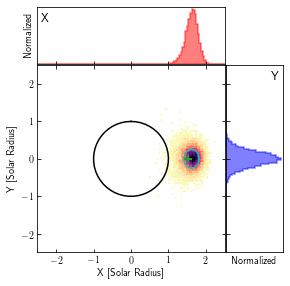

In [561]:
#hst = plt.hist2d(x_im_stat,y_im_stat,bins=[np.linspace(-2,2,100),np.linspace(-2,2,100)],weights=np.exp(-tau_stat))
#plt.axis('equal')
from sunRay.showPlot import XYDistributionImageHist

x_0,y_0=np.mean(r_vec0_rot,axis=1)[0:2]

fig,ax=XYDistributionImageHist(x_im_stat,y_im_stat,bins_data=np.linspace(-2.5,2.5,120)
            ,weights_data=weights_stat)

ax.plot(x_0,y_0,'+',color='C2',mew=2,markersize=8)

fig.savefig('img/xydist.pdf')


Total duration : 0.7673476006564034
Duration R/D : [0.10399 0.66336]
Vx R/D : 0.05314 , -0.04028
Vx R/D (c) : 0.12338 , -0.09351
Vy R/D : 0.05588 , 0.00031
Vy R/D (c) : 0.12973 , 0.00072
ERx R/D : 0.60428 , 0.22525
ERx R/D (Deg) : 0.32228 , 0.12013
ERx R/D : 0.34664 , 0.39247
ERx R/D (Deg) : 0.18487 , 0.20932
Offset R/D  x: 0.104734 , 0.110027
Offset R/D  y: -0.000864 , 0.005676


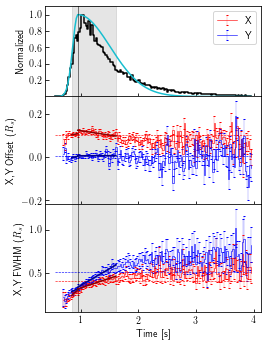

In [562]:
from sunRay.showPlot import XYVariationPlot,MuVariationPlot

fig=XYVariationPlot(x_im_stat,y_im_stat,t_reach_1au_stat,weights_stat,num_t_bins = 140,x_0=x_0,y_0=y_0,offset=True)
fig[0].savefig('img/varXYt.pdf')

#print the variation make a table #TODO
# offset
# 140 in paper

In [551]:
(xc,yc,sx,sy,err_xc,err_yc,err_sx,err_sy
    ) = raystat.centroidXYFWHM(x_im_stat,y_im_stat,weights_stat)

print(xc-x_0,yc-y_0,sx,sy)

0.11054650220561113 0.0019970668604569817 0.6721773733998776 0.6915812796538204


In [443]:
np.mean(np.sqrt(np.sum(r_vec_stat_avail**2,axis=0)))

205.00000005381696

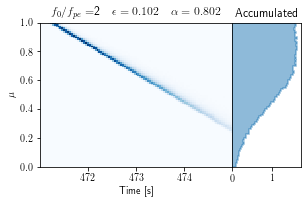

In [341]:

(fig,ax1,ax2)=MuVariationPlot(k_vec_stat_avail,t_reach_stat_avail,
                              np.exp(-tau_stat_avail),t_step = 0.05,
                    num_t_bins=100,num_mu_bins=80)

ax1.set_title(r'$f_0/f_{pe}=$'+str(np.round(f_ratio,3))+r'\quad'+
              r'$\epsilon='+str(np.round(epsilon,3))+r'\quad \alpha='+
              str(np.round(anis,3))+'$')

fig.savefig('img/'+pat+'_eps'+str(np.round(epsilon,3))+'a'+str(np.round(anis,3))+'.pdf')

In [342]:
np.sum(np.exp(-tau_stat_avail))/3e6


0.09374743948680511

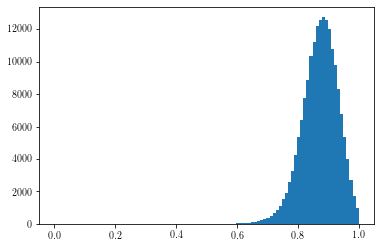

In [12]:
# make a movie
if False:
    from sunRay import showPlot as sp
    x0,y0=np.mean(r_vec0_rot,axis=1)[0],np.mean(r_vec0_rot,axis=1)[1]
    fr_cur=sp.MovieVariationXY(x_im_stat,y_im_stat,t_reach_1au_stat,weights_stat,t_step = 0.2,
                               num_t_bins=-1,xlim=[0,2],ylim=[-1,1],x_0=x0,y_0=y0,
                               title_this=r'$f_0/f_{pe}=$'+str(np.round(f_ratio,3))+r'\quad'+
                  r'$\epsilon='+str(np.round(epsilon,3))+r'\quad \alpha='+
                  str(np.round(anis,3))+r'\quad\theta_0='+str(np.round(ang_rot,3))+'$')
    #plt.gca().set_clim([0,1])
    #fr_cur.savefig('test_movie.png')

In [13]:
np.sqrt(np.sum(r_vec_stat_avail**2,axis=0))

array([204.99999343, 204.99999749, 205.00000024, ..., 205.0000037 ,
       205.00000963, 204.99999017])

In [14]:
k_vec_stat_avail.shape[0]

3

In [15]:
np.histogram(np.array([1,2,3]),bins=np.linspace(0,30,50))

(array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]),
 array([ 0.        ,  0.6122449 ,  1.2244898 ,  1.83673469,  2.44897959,
         3.06122449,  3.67346939,  4.28571429,  4.89795918,  5.51020408,
         6.12244898,  6.73469388,  7.34693878,  7.95918367,  8.57142857,
         9.18367347,  9.79591837, 10.40816327, 11.02040816, 11.63265306,
        12.24489796, 12.85714286, 13.46938776, 14.08163265, 14.69387755,
        15.30612245, 15.91836735, 16.53061224, 17.14285714, 17.75510204,
        18.36734694, 18.97959184, 19.59183673, 20.20408163, 20.81632653,
        21.42857143, 22.04081633, 22.65306122, 23.26530612, 23.87755102,
        24.48979592, 25.10204082, 25.71428571, 26.32653061, 26.93877551,
        27.55102041, 28.16326531, 28.7755102 , 29.3877551 , 30.        ]))

In [16]:
import sunRay.plasmaFreq as pfreq

import numpy as np 
import torch
from sunRay.parameters import c_r
from sunRay import plasmaFreq as pfreq
from sunRay import densityModel as dm
from scipy import integrate
from scipy.optimize import curve_fit

In [17]:
integrate.quad(lambda x: (1/(c_r*np.sqrt(1.0-
                (pfreq.omega_pe_r_np(dm.leblanc98,x)/(omega0))**2)) ) ,1.4,215 )[0]

/home/amax/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


496.29489124890836

In [18]:
integrate.quad(lambda x: (1/(c_r*np.sqrt(1.0-
                (pfreq.omega_pe_r_np(dm.leblanc98,x)/(omega0*1.5))**2)) ) ,1.4,215 )[0]

496.0237828757457

In [13]:
'1'.rjust(3,'0')

'001'

In [221]:
x_0,y_0=np.mean(r_vec0_rot,axis=1)[0:2]

array([8.75033375e-01, 1.48617948e-08])

In [198]:
r_vec0_rot

array([[ 8.74904070e-01,  8.75072607e-01,  8.75059350e-01, ...,
         8.75124239e-01,  8.74971592e-01,  8.75116448e-01],
       [ 5.84294612e-05,  1.10376946e-04,  1.09373301e-04, ...,
         4.66776619e-05, -1.26895538e-04,  6.18316844e-05],
       [ 1.51561512e+00,  1.51553199e+00,  1.51559058e+00, ...,
         1.51554513e+00,  1.51557091e+00,  1.51552940e+00]])

In [292]:
1/c_r

2.321547698465644

In [310]:
205/215

0.9534883720930233

In [9]:

            flux_all = np.sum(weights_stat)/photon_N

In [10]:
flux_all

0.023393052241406653